<a href="https://colab.research.google.com/github/iffahaaqilah/group_project/blob/master/Assignment_2_Build_an_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Make sure your compute resource is set to GPU else you'll need to reset your session from scratch**

---
Group yourself to 3 max, and fill in below details
Group member detail(s): \
1. Dk Nur Batrisyia Binti Pg Hj Shaifulrizal - 20B2110
2. Nur Amirah Syafiqah Binti Ramlee - 21B6009
3. Syasya Syahirah Binti Karamilahi - 19B2097
4. Nur Iffah A'qilah Binti Shahfrien - 21B6017

Some of the concepts may be technically advanced, instead, it is to focus on learning how to effectively use Google Colab for scientific research. Don't fret if you dont understand any of codes written for you.

# Setting up Environment

Task 1: Set Up the Environment \
Import the necessary libraries for the exercise, PyTorch for neural network training.\
Load the CIFAR10 dataset.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# Set the device to GPU if available, otherwise, use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Define the modified neural network architecture for CIFAR-10
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 8 * 32, 128)  # Adjusted for CIFAR-10 image size
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Output size matches the number of CIFAR-10 classes (10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 8 * 8 * 32)  # Adjusted for CIFAR-10 image size
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


Below are the Hyperparameters for the neural network (think of it as knobs that you can tune to enhance performance)


Task 4: Model debugging (Mess around with these 3 hyperparameters) \
hint: \
LEARNING_RATE: The current value is set to 1e10 (10000000000.0). Try adjusting it to find an optimal learning rate.\
BATCH_SIZE: Set it to a power of 2, such as 16, 32, or 64, to potentially improve training efficiency. \
EPOCH: Consider letting the model train for more epochs. The default value is set to 1; experiment with longer training durations for better convergence and performance evaluation.

In [ ]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCH = 10

In [ ]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.to(device)
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0  # Initialize a counter for correct predictions
        total_samples = 0  # Initialize a counter for total samples

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

             # Measure accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calculate accuracy for the current epoch
        accuracy = 100.0 * correct_predictions / total_samples
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy}")
    print("Training complete!")



In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)

100%|██████████| 170498071/170498071 [00:02<00:00, 77692007.13it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
# Load and preprocess the CFAR10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#TODO: Complete below line to import CIFAR10 dataset
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


In [ ]:
train_set.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
# Create the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

Task 2: Measure performance difference training between GPU and CPU


In [ ]:
# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=EPOCH)

Epoch 1/10, Loss: 2.1313, Accuracy: 24.608
Epoch 2/10, Loss: 1.7602, Accuracy: 37.536
Epoch 3/10, Loss: 1.5839, Accuracy: 43.52
Epoch 4/10, Loss: 1.4293, Accuracy: 48.87
Epoch 5/10, Loss: 1.3316, Accuracy: 52.518
Epoch 6/10, Loss: 1.2642, Accuracy: 55.214
Epoch 7/10, Loss: 1.2062, Accuracy: 57.288
Epoch 8/10, Loss: 1.1533, Accuracy: 59.296
Epoch 9/10, Loss: 1.1087, Accuracy: 61.048
Epoch 10/10, Loss: 1.0683, Accuracy: 62.512
Training complete!


Report your findings on:
*   What were the key differences you observed in the training speed between the GPU and CPU?

From the results below, we can see that the runtime for GPU is 2 minutes while the runtime for CPU is 7 minutes. Thus, we can conclude that GPU has better training speed than CPU.

*   Were there any challenges or limitations you encountered while using the GPU for training?

For this task, we did not encounter any challenges while using GPU

*   Did you notice any impact on the final model's performance (accuracy, loss) when trained on the GPU versus the CPU?

The loss for both CPU and GPU decreases significantly, however GPU has a slightly higher loss with it's highest loss value at 2.1323 meanwhile CPU's highest loss value is has 2.1313

Both GPU and CPU has an exponential increase in the accuracy value










(CPU - Runtime 7 Minutes)
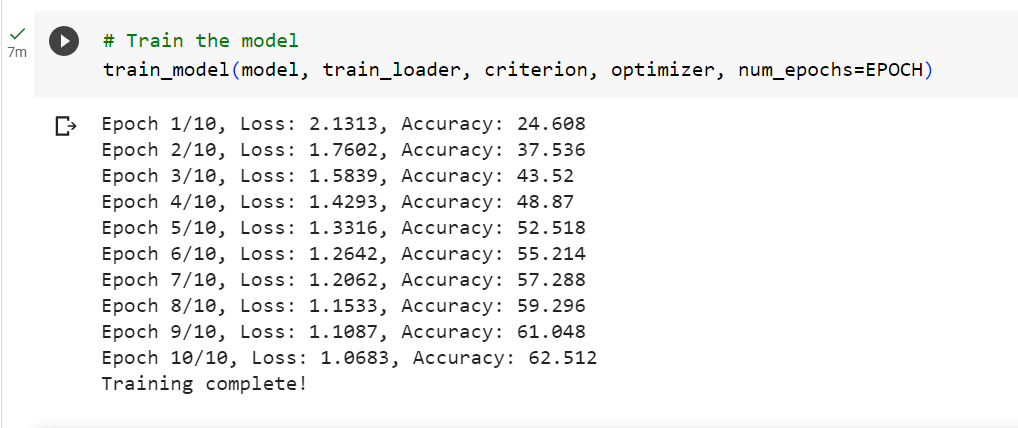

(GPU - Runtime 2 Minutes)
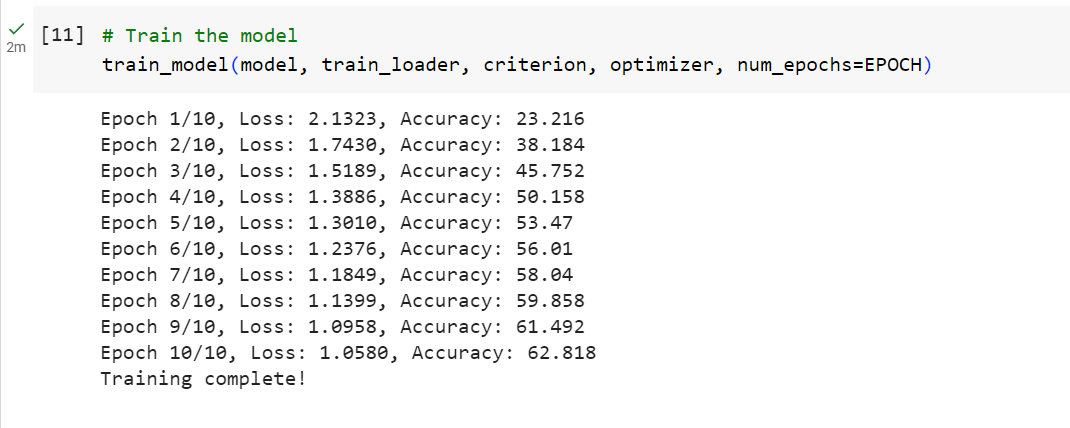



Task 3: Visualize Loss and Accuracy


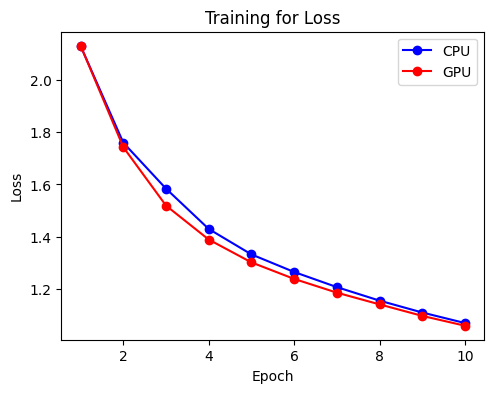

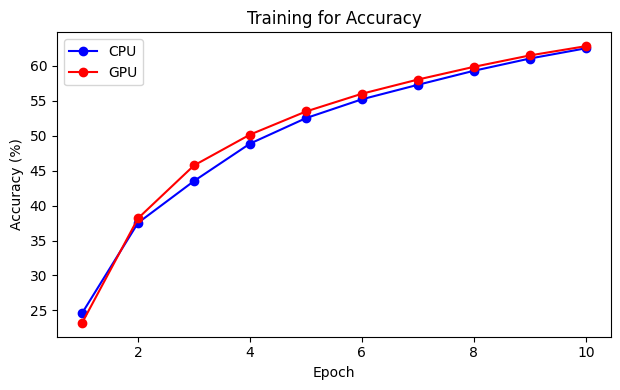

In [ ]:
#TODO:
#Your plots goes here

# Import Library for Plots
import matplotlib.pyplot as plt

# Values Obtained in Model Training
loss_val_CPU = [2.1313, 1.7602, 1.5839, 1.4293, 1.3316, 1.2642, 1.2062, 1.1543, 1.1087, 1.0683]
accuracy_val_CPU = [24.608, 37.536, 43.52, 48.87, 52.518, 55.214, 57.288, 59.296, 61.048, 62.512]

loss_val_GPU = [2.1323, 1.7430, 1.5189, 1.3886, 1.3010, 1.2376, 1.1849, 1.1399, 1.0958, 1.0580]
accuracy_val_GPU = [23.216, 38.184, 45.752, 50.158, 53.47, 56.01, 58.04, 59.858, 61.492, 62.818]

epochs = list(range(1, 11))

# Plotting Loss Curve
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs, loss_val_CPU, label = 'CPU', marker='o', color='b')
plt.plot(epochs, loss_val_GPU, label = 'GPU', marker='o', color='r')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training for Loss')

# Plotting Accuracy Curve
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(epochs, accuracy_val_CPU, label = 'CPU', marker='o', color='b')
plt.plot(epochs, accuracy_val_GPU, label = 'GPU', marker='o', color='r')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training for Accuracy')

# Display both Curves
plt.tight_layout()
plt.show()

Task 4: Test your own Image \
You can use the same code from the tutorial and ensure your model is properly trained!



In [ ]:
transform = transforms.Compose([
    transforms.Resize((30, 30)),  # Resize the image to match the model input size
    transforms.ToTensor(),  # Convert the image to a tensor
   transforms.Normalize((0.5,), (0.5,)),  # Normalize the image
])

# Function to preprocess and make predictions on the uploaded image
def predict_uploaded_image(upload):
    # Open the uploaded image
    image = Image.open(upload).convert('L')
    model.to("cpu")  # Set the model to evaluation mode

    # Preprocess the image
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

    # Make predictions using the model
    with torch.no_grad():
        output = model(input_batch)
    _, predicted_idx = torch.max(output, 1)

    print(f"Predicted labels: {predicted_idx}")




In [ ]:
# Upload an image for prediction
uploaded = files.upload()

# If an image is uploaded, call the prediction function
if len(uploaded) > 0:
    for file_name in uploaded.keys():
        predict_uploaded_image(file_name)
else:
    print("No image uploaded.")

NameError: ignored